# Testing of the dispersion relation from SLN for Forward volume waves
Ondra built it with ChatGPT during JEMS, but it needs testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SpinWaveToolkit as swt
import pandas as pd

print(swt.__version__)

1.1.1dev


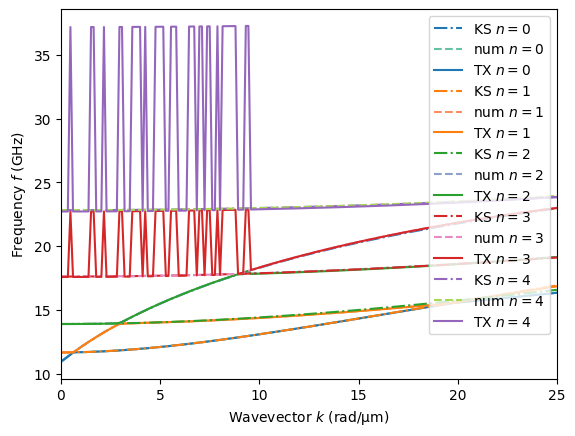

In [3]:
bext = 2500e-3
k = np.linspace(0, 25e6, 1000)+1  # in rad/m
d = 78e-9
mat = swt.Material(1700e3, 13e-12, 4e-3, 0, 30*2e9*np.pi)
ku1 = 4.9e5*0
theta = 0*np.pi/2
phi = 0
nmodes = 5


sl = swt.SingleLayer(bext-mat.Ms*swt.MU0, mat, d, k, theta, phi)
f_sl = np.array([sl.GetDispersion(i)/(2e9*np.pi) for i in range(nmodes)])
sln = swt.SingleLayerNumeric(bext-mat.Ms*swt.MU0, mat, d, k, theta, phi, KuOOP=0, N=nmodes+2)
f_sln = sln.GetDispersion()[0]/(2e9*np.pi)


df = pd.read_csv(r"M:\JupyterLab\Klima\TetraX_vs_SWT\fv_tests\FeNi_78_no_kuoop\eigen\spectrum_dataframe.csv")

# Assuming:
# col 1 = index
# col 2 = wavenumber
# col 4,5,6 = three modes
k_exp = df.iloc[:, 1].values   # 2nd column (Python indexing starts at 0)
modes_exp = df.iloc[:, 3:3+nmodes].to_numpy().T  # 4th–6th column


cmap = plt.get_cmap("tab10")
cmap2 = plt.get_cmap("Set2")
for i in range(nmodes):
    plt.plot(k*1e-6, f_sl[i], "-.", label=f"KS $n={i}$", c=cmap(i))
    plt.plot(k*1e-6, f_sln[i], "--", label=f"num $n={i}$", c=cmap2(i))
    plt.plot(k_exp*1e-6, modes_exp[i] / (1e9), "-", label=f"TX $n={i}$", markersize=3)
plt.xlabel("Wavevector $k$ (rad/µm)")
plt.ylabel("Frequency $f$ (GHz)")
plt.legend(loc="upper right")
plt.xlim(0, 25)
plt.show()


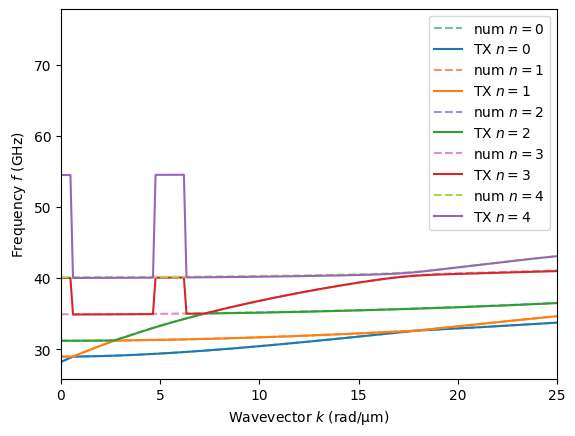

In [8]:
bext = 2500e-3
k = np.linspace(0, 25e6, 1000)+1  # in rad/m
d = 78e-9
mat = swt.Material(1700e3, 13e-12, 4e-3, 0, 30*2e9*np.pi)
ku1 = 4.9e5
theta = 0*np.pi/2
phi = 0
nmodes = 5


df = pd.read_csv(r"M:\JupyterLab\Klima\TetraX_vs_SWT\fv_tests\FeNi_78\eigen\spectrum_dataframe.csv")

# Assuming:
# col 1 = index
# col 2 = wavenumber
# col 4,5,6 = three modes
k_exp = df.iloc[:, 1].values   # 2nd column (Python indexing starts at 0)
modes_exp = df.iloc[:, 3:3+nmodes].to_numpy().T  # 4th–6th column



sln = swt.SingleLayerNumeric(bext-mat.Ms*swt.MU0+2*ku1/mat.Ms, mat, d, k, theta, phi, KuOOP=0, N=nmodes+2)
# sln = swt.SingleLayerNumeric(bext, mat, d, k, theta, phi, KuOOP=ku1, N=nmodes+2)
f_sln = sln.GetDispersion()[0]/(2e9*np.pi)

cmap = plt.get_cmap("tab10")
cmap2 = plt.get_cmap("Set2")
for i in range(nmodes):
    plt.plot(k*1e-6, f_sln[i], "--", label=f"num $n={i}$", c=cmap2(i))
    #TetraX spectrum (CSV)
    plt.plot(k_exp*1e-6, modes_exp[i] / (1e9), "-", label=f"TX $n={i}$", markersize=3)

plt.xlabel("Wavevector $k$ (rad/µm)")
plt.ylabel("Frequency $f$ (GHz)")
plt.legend(loc="upper right")
plt.xlim(0, 25)
plt.show()